In [48]:
%matplotlib inline
import theano
floatX = theano.config.floatX
import pymc3 as pm
import theano.tensor as T
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_moons

from tensorflow.examples.tutorials.mnist import input_data

In [60]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [61]:
print("train: "+str(mnist.train.num_examples))
print("test: "+str(mnist.test.num_examples))

train: 55000
test: 10000


In [62]:
N_BATCH = 100
N_FEATURES = 28*28
N_CLASSES = 10
#N_FEATURES = 4
#N_CLASSES = 3

In [63]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_w1 = np.random.randn(N_FEATURES, N_CLASSES).astype(floatX)
    init_b1 = np.random.randn(N_CLASSES).astype(floatX)

    with pm.Model() as neural_network:
        w1 = pm.Normal('w1', 0, sd=1,
                                 shape=(N_FEATURES, N_CLASSES),
                                 testval=init_w1)
        b1 = pm.Normal('b1', 0, sd=1, shape=(N_CLASSES,), testval=init_b1)

        # Build neural-network using tanh activation function
        y = pm.math.dot(ann_input, w1) + b1
        
        pred = pm.Deterministic('pred', T.nnet.softmax(y))

        out = pm.Categorical('out',
                             p = pred,
                             observed = ann_output,
                             total_size = mnist.train.num_examples,
                            )
    return neural_network

In [64]:
#iris = sns.load_dataset("iris")
#Y_train = pd.Categorical(iris['species']).labels
#x_n = iris.columns[:-1]
#X_train = iris[x_n].values
#Y_train = sklearn.preprocessing.LabelBinarizer().fit_transform(y_2)

In [67]:
Y_train = mnist.train.labels
X_train = mnist.train.images

x_batch = pm.Minibatch(X_train, N_BATCH)
y_batch = pm.Minibatch(Y_train, N_BATCH)

neural_network = construct_nn(x_batch, y_batch)

In [68]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [69]:
with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=30000, method=inference)

Average Loss = 110.07: 100%|██████████| 30000/30000 [02:06<00:00, 236.81it/s]
Finished [100%]: Average Loss = 110.08


In [70]:
trace = approx.sample(draws=5000)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e3f99290>,
      dtype=object)

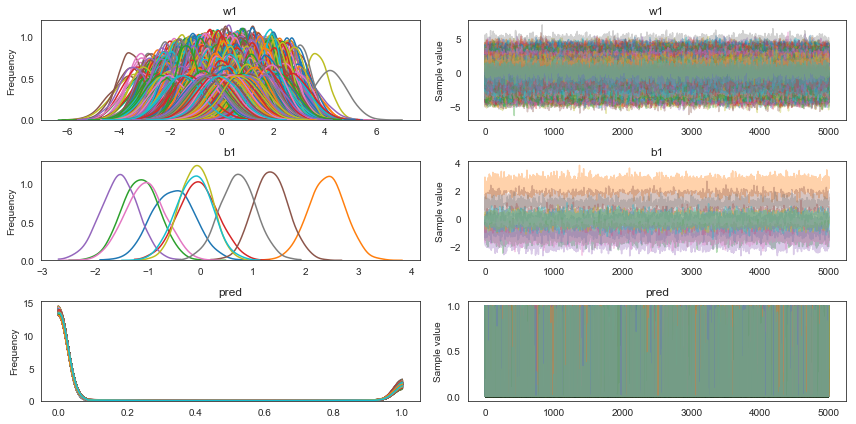

In [71]:
pm.traceplot(trace)

In [12]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import pandas as pd


In [13]:
iris = sns.load_dataset("iris")
y_2 = pd.Categorical(iris['species']).labels
x_n = iris.columns[:-1]
x_2 = iris[x_n].values

In [21]:
y_2_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_2)

In [53]:
y_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

In [66]:
mnist.train.labels

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)